In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from plotly import express as px

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df = train_df.drop(['Name', 'Cabin', 'Ticket', 'PassengerId', 'Embarked', 'SibSp', 'Parch', 'Fare'], axis=1)

In [8]:
train_df.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [10]:
train_df = pd.get_dummies(train_df)
train_df

,Survived,Pclass,Age,Sex_female,Sex_male
0,0,3,22.0,False,True
1,1,1,38.0,True,False
2,1,3,26.0,True,False
3,1,1,35.0,True,False
4,0,3,35.0,False,True
...,...,...,...,...,...
886,0,2,27.0,False,True
887,1,1,19.0,True,False
888,0,3,NaN,True,False
889,1,1,26.0,False,True


In [11]:
train_df['Sex_female'] = train_df['Sex_female'].astype(int)
train_df['Sex_male'] = train_df['Sex_male'].astype(int)

In [12]:
train_df.describe()

,Survived,Pclass,Age,Sex_female,Sex_male
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.352413,0.647587
std,0.486592,0.836071,14.526497,0.477990,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,1.000000,1.000000


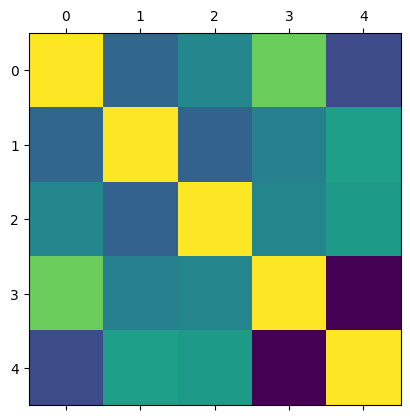

In [13]:
plt.matshow(train_df.corr())

In [15]:
y_train = train_df.Survived
x_train = train_df.drop('Survived', axis=1)

In [16]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
x_train

,Pclass,Age,Sex_female,Sex_male
0,3,22.0,0,1
1,1,38.0,1,0
2,3,26.0,1,0
3,1,35.0,1,0
4,3,35.0,0,1
...,...,...,...,...
886,2,27.0,0,1
887,1,19.0,1,0
888,3,NaN,1,0
889,1,26.0,0,1


In [19]:
x_train = (x_train - x_train.mean()) / (x_train.std())

In [20]:
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].median())

In [21]:
x_train

,Pclass,Age,Sex_female,Sex_male
0,0.826913,-0.530005,-0.737281,0.737281
1,-1.565228,0.571430,1.354813,-1.354813
2,0.826913,-0.254646,1.354813,-1.354813
3,-1.565228,0.364911,1.354813,-1.354813
4,0.826913,0.364911,-0.737281,0.737281
...,...,...,...,...
886,-0.369158,-0.185807,-0.737281,0.737281
887,-1.565228,-0.736524,1.354813,-1.354813
888,0.826913,-0.116967,1.354813,-1.354813
889,-1.565228,-0.254646,-0.737281,0.737281


In [22]:
x_train = x_train.values
y_train = y_train.values

In [23]:
y_encoded = []

for y in y_train:
    if y == 0:
        y_encoded.append([1, 0])
    elif y == 1:
        y_encoded.append([0, 1])
        
y_train = np.array(y_encoded)

In [24]:
print(x_train[0])
print(y_train[0])
print(f'X shape is {x_train.shape} and Y shape is {y_train.shape}')

[ 0.82691282 -0.5300051  -0.73728105  0.73728105]
[1 0]
X shape is (891, 4) and Y shape is (891, 2)


In [25]:
network_size = 3

input_size = 4
output_size = 2
hidden_layer_size = 3


weights = [np.random.randn(input_size, hidden_layer_size), np.random.randn(hidden_layer_size, output_size)]
biases = [np.random.randn(hidden_layer_size, 1), np.random.randn(output_size, 1)]

def sigmoid(v):
    return 1 / (1 + np.exp(-v))

def sigmoid_prime(v):
    return sigmoid(v) * (1 - sigmoid(v))

def tanh(v):
    return np.tanh(v)

def tanh_prime(v):
    return 1 - np.tanh(v) ** 2

def cost(hx, y):
    return (1/2*x_train.shape[0]) * np.sum(np.power(hx - y, 2))

def cost_prime(hx, y):
    return hx - y

def relu(v):
    return np.maximum(0, v)
    
def relu_prime(v):
    return np.greater(v, 0)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

activation = relu
activation_prime = relu_prime

In [26]:
def feed_forward(input):
    output = input
    output = output.reshape(output.shape[0], 1)
    for i in range(network_size - 1):
        z = np.dot(weights[i].T, output) + biases[i]
        if i < network_size - 2:
            output = activation(z)
        else: 
            output = softmax(z)
        
    return output.reshape(output_size, 1)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, random_state=0, train_size=0.7)

In [28]:
def evaluate(epoch):
    out = []

    for (x, y) in zip(X_test, Y_test):
        ans = feed_forward(x)
        out.append((np.argmax(ans), np.argmax(y)))
        
    print(f'Running epoch {epoch} Evaluation => {sum(int(x == y) for (x, y) in out)} / {len(out)} - Accuracy => {sum(int(x == y) for (x, y) in out) / len(out)}')

In [29]:
epochs = 100
learning_rate = 0.5

In [30]:
def shuffle_data():
    batch_size = 50

    batches = []

    for i in range(0, X_train.shape[0], batch_size):
        batches.append((X_train[i:i+batch_size], Y_train[i:i+batch_size]))
        
    return batches


In [31]:
weights = [np.random.randn(input_size, hidden_layer_size), np.random.randn(hidden_layer_size, output_size)]
biases = [np.random.randn(hidden_layer_size, 1), np.random.randn(output_size, 1)]


for epoch in range(epochs):
    
    X_train, Y_train = shuffle(X_train, Y_train)
    batches = shuffle_data()
    
    for batch in batches:
    
        delta_error = [np.zeros((input_size, hidden_layer_size)), np.zeros((hidden_layer_size, output_size))]
        delta_bias = [np.zeros((hidden_layer_size, 1)), np.zeros((output_size, 1))]
        
        batch_x, batch_y = batch
    
        for (x, y) in zip(batch_x, batch_y):
        
            activations = []
            zs = []

            # feed forward
            output = x
            output = output.reshape(output.shape[0], 1)
            activations.append(output)
            zs.append(output)

            for i in range(network_size - 1):
                z = np.dot(weights[i].T, output) + biases[i]
                if i < network_size - 2:
                    output = activation(z)
                else: 
                    output = softmax(z)
                activations.append(output)
                zs.append(z)

            # print(f'Epoch {epoch} - for some input the cost is {cost(activations[-1], y.reshape(26, 1))}')

            d_error = [np.zeros((input_size, hidden_layer_size)), np.zeros((hidden_layer_size, output_size))]
            d_bias = [np.zeros((hidden_layer_size, 1)), np.zeros((output_size, 1))]

            # delta = cost_prime(activations[-1], y.reshape(26, 1)) * sigmoid_prime(zs[-1].reshape(zs[-1].shape[0], 1))
            delta = cost_prime(activations[-1], y.reshape(output_size, 1))
            d_bias[-1] = delta
            d_error[-1] = np.dot(delta, activations[-2].T).T

            for l in range(2, network_size):
                delta = np.dot(weights[-l + 1], delta) * activation_prime(zs[-l].reshape(zs[-l].shape[0], 1))
                d_bias[-l] = delta
                d_error[-l] = np.dot(delta, activations[-l-1].T).T

            delta_error = [np.add(ne, de) for (ne, de) in zip(d_error, delta_error)]
            delta_bias = [np.add(nb, db) for (nb, db) in zip(d_bias, delta_bias)]


        weights = [w - (learning_rate / len(x_train)) * nw for (w, nw) in zip(weights, delta_error)]
        biases = [b - (learning_rate / len(x_train)) * nb for (b, nb) in zip(biases, delta_bias)]
    evaluate(epoch)

Running epoch 0 Evaluation => 96 / 268 - Accuracy => 0.3582089552238806
Running epoch 1 Evaluation => 159 / 268 - Accuracy => 0.5932835820895522
Running epoch 2 Evaluation => 171 / 268 - Accuracy => 0.6380597014925373
Running epoch 3 Evaluation => 195 / 268 - Accuracy => 0.7276119402985075
Running epoch 4 Evaluation => 200 / 268 - Accuracy => 0.746268656716418
Running epoch 5 Evaluation => 207 / 268 - Accuracy => 0.7723880597014925
Running epoch 6 Evaluation => 210 / 268 - Accuracy => 0.7835820895522388
Running epoch 7 Evaluation => 210 / 268 - Accuracy => 0.7835820895522388
Running epoch 8 Evaluation => 216 / 268 - Accuracy => 0.8059701492537313
Running epoch 9 Evaluation => 215 / 268 - Accuracy => 0.8022388059701493
Running epoch 10 Evaluation => 215 / 268 - Accuracy => 0.8022388059701493
Running epoch 11 Evaluation => 215 / 268 - Accuracy => 0.8022388059701493
Running epoch 12 Evaluation => 215 / 268 - Accuracy => 0.8022388059701493
Running epoch 13 Evaluation => 215 / 268 - Accurac

In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [33]:
test_df = test_df.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'Cabin', 'Embarked'], axis=1)

In [34]:
test_df

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,male,34.5,7.8292
1,893,3,female,47.0,7.0000
2,894,2,male,62.0,9.6875
3,895,3,male,27.0,8.6625
4,896,3,female,22.0,12.2875
...,...,...,...,...,...
413,1305,3,male,NaN,8.0500
414,1306,1,female,39.0,108.9000
415,1307,3,male,38.5,7.2500
416,1308,3,male,NaN,8.0500


In [35]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

In [36]:
test_df['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [37]:
test_df = pd.read_csv('test.csv')

In [38]:
test_df = pd.get_dummies(test_df)
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Master. Eugene Joseph","Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abrahamsson, Mr. Abraham August Johannes",...,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,893,3,47.0,1,0,7.0000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,894,2,62.0,0,0,9.6875,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,895,3,27.0,0,0,8.6625,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,896,3,22.0,1,1,12.2875,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
414,1306,1,39.0,0,0,108.9000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
415,1307,3,38.5,0,0,7.2500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
416,1308,3,NaN,0,0,8.0500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [39]:
test_df['Sex_female'] = test_df['Sex_female'].astype(int)
test_df['Sex_male'] = test_df['Sex_male'].astype(int)

In [44]:
test_data = test_df[['Pclass', 'Age', 'Sex_female', 'Sex_male']]
test_data

,Pclass,Age,Sex_female,Sex_male
0,3,34.5,0,1
1,3,47.0,1,0
2,2,62.0,0,1
3,3,27.0,0,1
4,3,22.0,1,0
...,...,...,...,...
413,3,NaN,0,1
414,1,39.0,1,0
415,3,38.5,0,1
416,3,NaN,0,1


In [41]:
test_data = (test_data - test_data.mean()) / (test_data.std())

In [42]:
test_data

,Pclass,Age,Fare,Sex_female,Sex_male
0,0.872436,0.298099,-0.497213,-0.755024,0.755024
1,0.872436,1.179547,-0.512045,1.321292,-1.321292
2,-0.315441,2.237285,-0.463974,-0.755024,0.755024
3,0.872436,-0.230769,-0.482308,-0.755024,0.755024
4,0.872436,-0.583349,-0.417469,1.321292,-1.321292
...,...,...,...,...,...
413,0.872436,NaN,-0.493264,-0.755024,0.755024
414,-1.503319,0.615421,1.310606,1.321292,-1.321292
415,0.872436,0.580163,-0.507573,-0.755024,0.755024
416,0.872436,NaN,-0.493264,-0.755024,0.755024


In [43]:
out = []
for data in test_data.values:
    ans = feed_forward(data)
    out.append(np.argmax(ans))
out   

ValueError: shapes (3,4) and (5,1) not aligned: 4 (dim 1) != 5 (dim 0)

In [121]:
submission = pd.DataFrame(test_df['PassengerId'])

In [122]:
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [123]:
submission['Survived'] = np.array(out)

In [124]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [125]:
submission.to_csv('submission.csv', index=False)